# Preamble

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm
import h5py
from scipy import stats
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18, z_at_value
import astropy.units as unit
from sklearn.mixture import GaussianMixture
import corner

# Appendix Plots

## Fig 4

In [2]:
var = "N1e7_Fiducial_AllDCO_AIS"
with h5py.File("/mnt/home/sroy1/Data_Release_RedEvolBNS/compare_pop.h5", "r") as file:
    m1_fid = np.array(file["m1_"+var])
    m2_fid = np.array(file["m2_"+var])
    z_fid = np.array(file["z_"+var])
file.close()

In [3]:
df_GW170817 = pd.read_hdf('/mnt/home/sroy1/ceph/GW170817_GW190425/GW170817_GWTC-1.hdf5', key='IMRPhenomPv2NRT_lowSpin_posterior')
m1z_GW170817 = np.array(df_GW170817['m1_detector_frame_Msun'])
m2z_GW170817 = np.array(df_GW170817['m2_detector_frame_Msun'])
z_GW170817 = z_at_value(Planck18.luminosity_distance, np.array(df_GW170817['luminosity_distance_Mpc'])*unit.Mpc).value
m1_GW170817 = m1z_GW170817/(1+z_GW170817)
m2_GW170817 = m2z_GW170817/(1+z_GW170817)

In [4]:
df_GW190425 = pd.read_hdf('/mnt/home/sroy1/ceph/GW170817_GW190425/IGWN-GWTC2p1-v2-GW190425_081805_PEDataRelease_mixed_cosmo.h5',
                          key='C01:IMRPhenomPv2_NRTidal:LowSpin/posterior_samples')
m1z_GW190425 = np.array(df_GW190425['mass_1'])
m2z_GW190425 = np.array(df_GW190425['mass_2'])
z_GW190425 = z_at_value(Planck18.luminosity_distance, np.array(df_GW190425['luminosity_distance'])*unit.Mpc).value
m1_GW190425 = m1z_GW190425/(1+z_GW190425)
m2_GW190425 = m2z_GW190425/(1+z_GW190425)

/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: "'geocent'_time"; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/home/sroy1/miniconda3/envs/popcosmo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

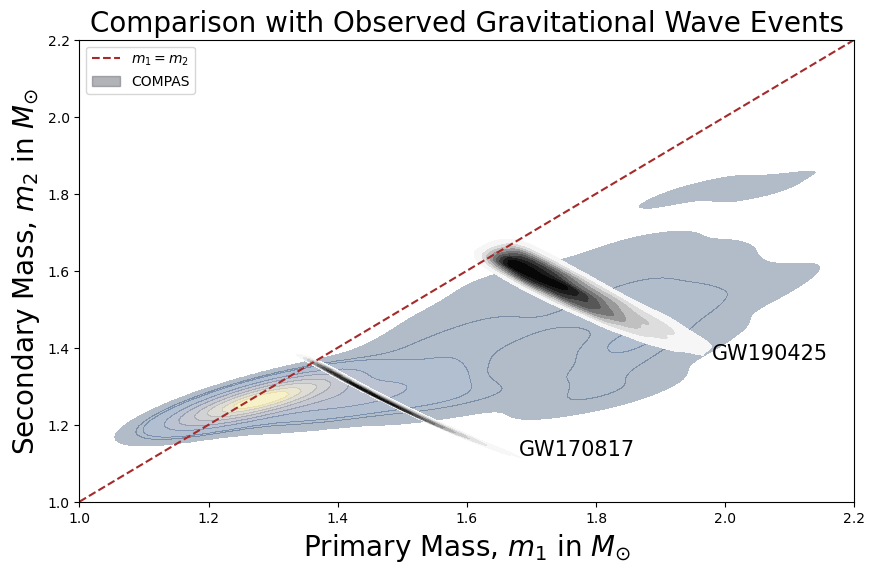

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=m1_fid[:10000], y=m2_fid[:10000], cmap='cividis', fill=True, alpha=0.3, label='COMPAS')
sns.kdeplot(x=m1_GW170817, y=m2_GW170817, cmap='Greys', fill=True)
sns.kdeplot(x=m1_GW190425, y=m2_GW190425, cmap='Greys', fill=True)

plt.plot([1, 2.25], [1, 2.25], color='brown', linestyle='--', label=r'$m_1 = m_2$')

plt.xlim(1, 2.2)
plt.ylim(1, 2.2)
plt.text(x=1.68, y=1.12, fontsize=15, s=r'GW170817')
plt.text(x=1.98, y=1.37, fontsize=15, s=r'GW190425')
plt.title('Comparison with Observed Gravitational Wave Events', fontsize=20)
plt.xlabel(r'Primary Mass, $m_1$ in $M_{\odot}$', fontsize=20)
plt.ylabel(r'Secondary Mass, $m_2$ in $M_{\odot}$', fontsize=20)

cmap = cm.get_cmap('cividis')
color_with_alpha = (*cmap(0.4)[:3], 0.5)

plt.legend(handles = [plt.Line2D([0], [0], color='brown', linestyle='--', label=r'$m_1 = m_2$')] + [Patch(color=color_with_alpha, label='COMPAS')])
plt.savefig('Plots/Fig4_GW.pdf', bbox_inches="tight");

In [6]:
# https://arxiv.org/abs/2405.00089
m1_GAIA = np.array([1.33, 1.31, 1.323, 1.473, 1.28, 1.291, 1.34, 1.362, 1.39, 1.258, 1.396, 1.70, 1.38, 1.362, 1.898, 1.52, 1.396, 1.443, 1.604, 1.401, 1.48])
delm1_GAIA = np.array([0.05, 0.04, 0.032, 0.034, 0.04, 0.024, 0.04, 0.030, 0.04, 0.032, 0.033, 0.07, 0.04, 0.034, 0.030, 0.07, 0.035, 0.023, 0.034, 0.034, 0.09])

# PSR J0030+0451: https://arxiv.org/abs/1912.05702, PSR J0740+6620: https://arxiv.org/abs/2105.06980, PSR J0437–4715: https://arxiv.org/abs/2407.06789
m1_NICER = np.array([1.34, 2.072, 1.418])
delm1_NICER = np.array([0.16, 0.067, 0.037])

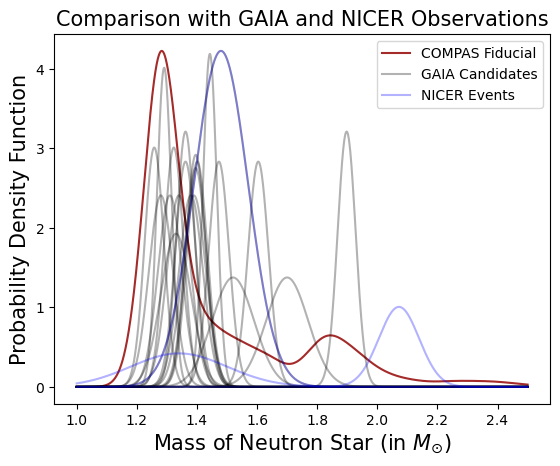

In [7]:
m1_array = np.linspace(1, 2.5, 10000)
kernel = stats.gaussian_kde(m1_fid[:10000])
pdf = kernel.pdf(m1_array)

plt.plot(m1_array, pdf, color='brown', label='COMPAS Fiducial')
max = np.max(pdf)
max1 = 17.5

for i in range(len(m1_GAIA)-1):
    y = stats.norm(m1_GAIA[i], delm1_GAIA[i]).pdf(m1_array)
    plt.plot(m1_array, (max/max1)*y, color='black', alpha=0.3)

i = len(m1_GAIA)-1
y = stats.norm(m1_GAIA[i], delm1_GAIA[i]).pdf(m1_array)
max1 = np.max(y)
plt.plot(m1_array, (max/max1)*y, color='black', alpha=0.3, label='GAIA Candidates')

max1 = 25

for i in range(len(m1_NICER)-1):
    y = stats.norm(m1_NICER[i], delm1_NICER[i]).pdf(m1_array)
    plt.plot(m1_array, (max/max1)*y, color='blue', alpha=0.3)

i = len(m1_GAIA)-1
y = stats.norm(m1_GAIA[i], delm1_GAIA[i]).pdf(m1_array)
max1 = np.max(y)
plt.plot(m1_array, (max/max1)*y, color='blue', alpha=0.3, label='NICER Events')

plt.title('Comparison with GAIA and NICER Observations', fontsize=15)
plt.xlabel(r'Mass of Neutron Star (in $M_{\odot}$)', fontsize=15)
plt.ylabel('Probability Density Function', fontsize=15)
plt.legend()
plt.savefig('Plots/Fig4_EM.pdf', bbox_inches="tight");

## Fig 5

In [8]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [9]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

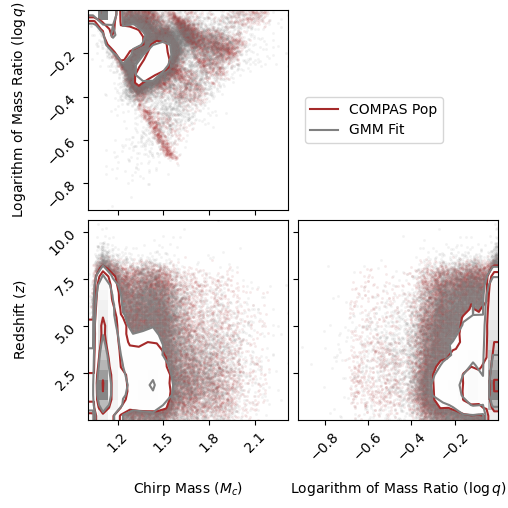

In [10]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig("Plots/Fig5_"+var+'_gmm_all.pdf');

In [11]:
mask = np.logical_and(logq>-0.7, logq<-0.5)
print('GMM can not fit', len(logq[mask])/len(logq)*100, '% samples.')

GMM can not fit 0.461 % samples.


In [12]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file:
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
    z = np.array(file['z_'+var])
file.close()

ns = len(Mc)

In [13]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_all'])
    means = np.array(file['mean_'+var+'_all'])
    covs = np.array(file['cov_'+var+'_all'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm, z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]
mask1 = logq_gm>0
logq_gm[mask1] = -logq_gm[mask1]

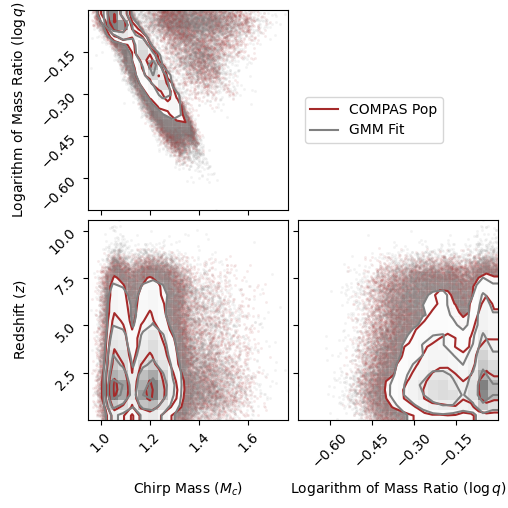

In [14]:
fig = corner.corner(np.array([Mc, logq, z]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$', r'Redshift $(z)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm, z_gm]).T, fig=fig, color='grey')

ndim = 3
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 1.5, 1., .0), loc=6)
plt.savefig("Plots/Fig5_"+var+'_gmm_all.pdf');

## Fig 6

In [15]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
file.close()

ns = len(Mc)

In [16]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_mass'])
    means = np.array(file['mean_'+var+'_mass'])
    covs = np.array(file['cov_'+var+'_mass'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm = gm_samp.T

mask = logq_gm>0
logq_gm[mask] = -logq_gm[mask]

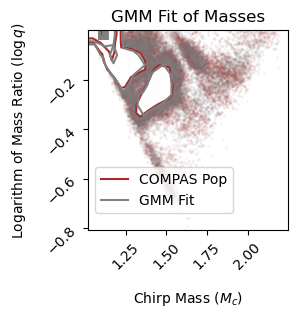

In [17]:
fig = corner.corner(np.array([Mc, logq]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm]).T, fig=fig, color='grey')

ndim = 2
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 0.2, 0., .0), loc=6)
plt.title('GMM Fit of Masses')
plt.savefig("Plots/Fig6_"+var+'_gmm_mass.pdf', bbox_inches="tight");

In [18]:
var = 'N1e7_Fiducial_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    z = np.array(file['z_'+var])
file.close()

ns = len(z)

In [19]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_redshift'])
    means = np.array(file['mean_'+var+'_redshift'])
    covs = np.array(file['cov_'+var+'_redshift'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]

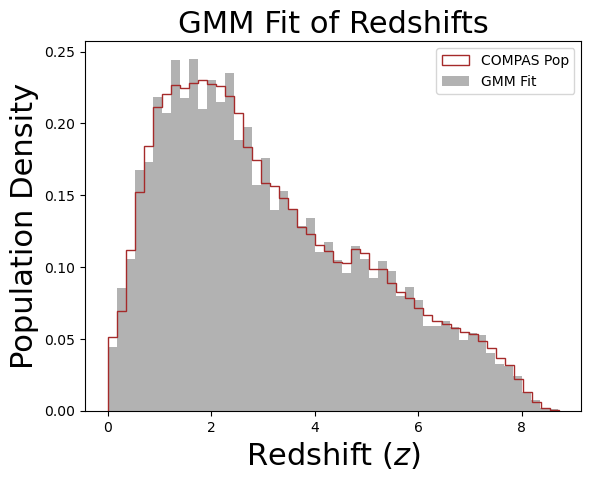

In [20]:
_ = plt.hist(z, bins=50, histtype='step', density=True, color='brown', label='COMPAS Pop')
_ = plt.hist(z_gm.flatten(), bins=50, density=True, color='grey', alpha=0.6, label='GMM Fit')
plt.legend()
plt.xlabel(r'Redshift ($z$)', fontsize=22)
plt.ylabel(r'Population Density', fontsize=22)
plt.title('GMM Fit of Redshifts', fontsize=22)
plt.savefig("Plots/Fig6_"+var+'_gmm_redshift.pdf', bbox_inches="tight");

In [21]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    Mc = np.array(file['Mc_'+var])
    logq = np.array(file['logq_'+var])
file.close()

ns = len(Mc)

In [22]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_mass'])
    means = np.array(file['mean_'+var+'_mass'])
    covs = np.array(file['cov_'+var+'_mass'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
Mc_gm, logq_gm = gm_samp.T

mask = logq_gm>0
logq_gm[mask] = -logq_gm[mask]

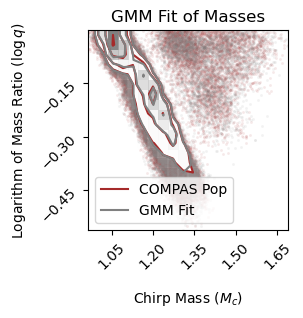

In [23]:
fig = corner.corner(np.array([Mc, logq]).T, labels=[r'Chirp Mass $(M_c)$',
                    r'Logarithm of Mass Ratio $(\log q)$'], color='brown')
fig = corner.corner(np.array([Mc_gm, logq_gm]).T, fig=fig, color='grey')

ndim = 2
axes = np.array(fig.axes).reshape((ndim, ndim))
for a in axes[np.triu_indices(ndim)]:
    a.remove()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="COMPAS Pop")
grey_line = mlines.Line2D([], [], color="grey", label="GMM Fit")

plt.legend(handles=[brown_line, grey_line], bbox_to_anchor=(0., 0.15, 0., .0), loc=6)
plt.title('GMM Fit of Masses')
plt.savefig("Plots/Fig6_"+var+'_gmm_mass.pdf', bbox_inches="tight");

In [24]:
var = 'N1e7_MullerMandel_AllDCO_AIS'
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/variant_pop.h5', 'r') as file: #Marginalized Samples
    z = np.array(file['z_'+var])
file.close()

ns = len(z)

In [25]:
with h5py.File('/mnt/home/sroy1/Data_Release_RedEvolBNS/gmm.h5', 'r') as file:
    weights = np.array(file['weight_'+var+'_redshift'])
    means = np.array(file['mean_'+var+'_redshift'])
    covs = np.array(file['cov_'+var+'_redshift'])
file.close()

gm = GaussianMixture(weights.shape[0])
gm.weights_ = weights
gm.means_ = means
gm.covariances_ = covs

gm_samp, _ = gm.sample(ns)
z_gm = gm_samp.T

mask = z_gm<0
z_gm[mask] = -z_gm[mask]

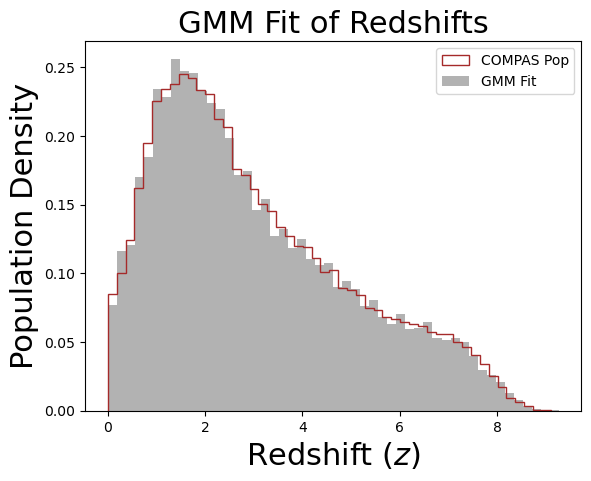

In [26]:
_ = plt.hist(z, bins=50, histtype='step', density=True, color='brown', label='COMPAS Pop')
_ = plt.hist(z_gm.flatten(), bins=50, density=True, color='grey', alpha=0.6, label='GMM Fit')
plt.legend()
plt.xlabel(r'Redshift ($z$)', fontsize=22)
plt.ylabel(r'Population Density', fontsize=22)
plt.title('GMM Fit of Redshifts', fontsize=22)
plt.savefig("Plots/Fig6_"+var+'_gmm_redshift.pdf', bbox_inches="tight");